<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Before-you-start:" data-toc-modified-id="Before-you-start:-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Before you start:</a></span></li></ul></li><li><span><a href="#Challenge-1" data-toc-modified-id="Challenge-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Challenge 1</a></span></li><li><span><a href="#Challenge-2" data-toc-modified-id="Challenge-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 2</a></span></li><li><span><a href="#Bonus-Challenge:-Error-Analysis" data-toc-modified-id="Bonus-Challenge:-Error-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bonus Challenge: Error Analysis</a></span></li></ul></div>

# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [2]:
%config Completer.use_jedi = False

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
# Your code here. 
student_data = pd.DataFrame({'age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
                             'tardiness': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
                            })

Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='age', ylabel='tardiness'>

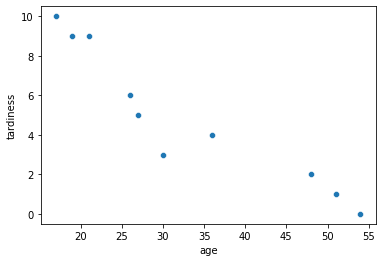

In [4]:
# Your code here.
sns.scatterplot(data = student_data, x="age", y="tardiness")

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

It seems like there is a relatively strong relationship between age and tardiness. The older the student the less often they are late to class

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
student_data.corr()

,age,tardiness
age,1.000000,-0.939163
tardiness,-0.939163,1.000000


In [6]:
student_data.cov()

,age,tardiness
age,187.655556,-45.566667
tardiness,-45.566667,12.544444


Both covariance and correlation measure if two variables have a linear relationship with each other. However, correlation is usually prefered over covariance because the first offers more information and is comparable with other correlations, unlike covariance. While covariance shows the direction of the linear relationship (positive or negative), correlation shows both the direction and the strength (the closer to -1 or +1, the stronger the relationship). 

In this case, covariance shows there is a negative relationship between age and tardiness (-45). This means that if one increases the other decreases. However, we don't know how strong the relationship is

Correlation shows not only that the relationship is negative, but also that it is very strong (-0.94 is very close to -1)

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [7]:
# Your response here.

# create linear regression model
lr = LinearRegression()

# run the model and identify the beta coefficients for the formula Y = beta_0 +  beta_1 * X
lr.fit(
    X=student_data.age.to_frame(),
    y=student_data.tardiness
)

beta_1 = lr.coef_[0]
beta_0 = lr.intercept_

In [8]:
[beta_1, beta_0]

[-0.2428207709159809, 12.888803363135771]

In [9]:
# add prediction to DF
y_hat = beta_0 + beta_1 * student_data.age

The outcome variable will be the tardiness. The predictor variable will be the age.  We are doing a simple linear regression to predict the tardiness based on the age 

Plot your regression model on your scatter plot.

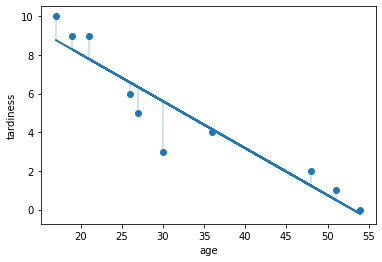

In [10]:
# Your code here.
plt.scatter(student_data.age, student_data.tardiness)
plt.plot(student_data.age, y_hat, lw=2)
plt.vlines(student_data.age, y_hat, student_data.tardiness, lw=0.4)
plt.xlabel('age')
plt.ylabel('tardiness')
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [11]:
# Your response here. 

# mean prediction to calculate TSS
mean_prediction = [student_data.tardiness.mean()] * student_data.age.size

# calculate TSS
TSS = ((student_data.tardiness - mean_prediction) ** 2).sum()

# calculate RSS
RSS = ((student_data.tardiness - y_hat) ** 2).sum()

In [12]:
TSS

112.9

In [13]:
RSS

13.319201847356268

In [14]:
#calculate R^2

R_2 = ((TSS-RSS)/TSS)
R_2

0.8820265558250109

In [15]:
lr.score(student_data.age.to_frame(), student_data.tardiness)

0.8820265558250109

An $R^2$ of 0.88 is quite high, meaning that the linear regression model we have calculated is pretty good. This means that age is a good predictor of tardiness for the students we have studied

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [16]:
# Import any libraries you may need & the data
df_veh = pd.read_csv('vehicles.csv')

In [17]:
df_veh.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [18]:
df_veh.columns = df_veh.columns.str.replace(" ", "_").str.replace("/", "_per_")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [19]:
# Your response here. 
df_veh.corr()

,Year,Engine_Displacement,Cylinders,Fuel_Barrels_per_Year,City_MPG,Highway_MPG,Combined_MPG,CO2_Emission_Grams_per_Mile,Fuel_Cost_per_Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine_Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel_Barrels_per_Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City_MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway_MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined_MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2_Emission_Grams_per_Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel_Cost_per_Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


Out of the selected variables, the one with the strongest correlation to CO2 emissions is Fuel Barrels / Year, and should therefore provide the most information when predicting CO2 emissions.  
On the other hand Year has the weakest correlation with CO2 emissions.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [20]:
# Your response here. 

# first we use the variable with the highest correlation

results = smf.ols('CO2_Emission_Grams_per_Mile ~ Fuel_Barrels_per_Year', data=df_veh).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     CO2_Emission_Grams_per_Mile   R-squared:                       0.973
Model:                                     OLS   Adj. R-squared:                  0.973
Method:                          Least Squares   F-statistic:                 1.275e+06
Date:                         Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                                 17:36:19   Log-Likelihood:            -1.5821e+05
No. Observations:                        35952   AIC:                         3.164e+05
Df Residuals:                            35950   BIC:                         3.164e+05
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                12.4865      0.423     29.523      0.000      11.658      13.316
Fuel_Barrels_per_Year    26.2836      0.023   1128.967      0.000      26.238      26.329
==============================================================================
Omnibus:                    88540.411   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        957228555.961
Skew:                          26.696   Prob(JB):                         0.00
Kurtosis:                     800.592   Cond. No.                         74.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# now we can add more variables and see if we get a higher R^2

results = smf.ols('CO2_Emission_Grams_per_Mile ~ Fuel_Barrels_per_Year + Fuel_Cost_per_Year', data=df_veh).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     CO2_Emission_Grams_per_Mile   R-squared:                       0.977
Model:                                     OLS   Adj. R-squared:                  0.977
Method:                          Least Squares   F-statistic:                 7.708e+05
Date:                         Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                                 17:36:19   Log-Likelihood:            -1.5487e+05
No. Observations:                        35952   AIC:                         3.098e+05
Df Residuals:                            35949   BIC:                         3.098e+05
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                10.0210      0.387     25.924      0.000       9.263      10.779
Fuel_Barrels_per_Year    22.1302      0.053    417.913      0.000      22.026      22.234
Fuel_Cost_per_Year        0.0399      0.000     85.609      0.000       0.039       0.041
==============================================================================
Omnibus:                    78651.444   Durbin-Watson:                   0.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        451445567.696
Skew:                          20.059   Prob(JB):                         0.00
Kurtosis:                     550.500   Cond. No.                     8.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
results = smf.ols('CO2_Emission_Grams_per_Mile ~ Fuel_Barrels_per_Year + Fuel_Cost_per_Year + Combined_MPG', data=df_veh).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     CO2_Emission_Grams_per_Mile   R-squared:                       0.980
Model:                                     OLS   Adj. R-squared:                  0.980
Method:                          Least Squares   F-statistic:                 5.932e+05
Date:                         Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                                 17:36:19   Log-Likelihood:            -1.5235e+05
No. Observations:                        35952   AIC:                         3.047e+05
Df Residuals:                            35948   BIC:                         3.047e+05
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               131.6742      1.691     77.861      0.000     128.359     134.989
Fuel_Barrels_per_Year    19.6955      0.059    331.484      0.000      19.579      19.812
Fuel_Cost_per_Year        0.0317      0.000     70.466      0.000       0.031       0.033
Combined_MPG             -3.1661      0.043    -73.626      0.000      -3.250      -3.082
==============================================================================
Omnibus:                    72593.271   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        277905639.131
Skew:                          16.687   Prob(JB):                         0.00
Kurtosis:                     432.423   Cond. No.                     3.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
results = smf.ols('CO2_Emission_Grams_per_Mile ~ Fuel_Barrels_per_Year + Fuel_Cost_per_Year + Combined_MPG + Cylinders', data=df_veh).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     CO2_Emission_Grams_per_Mile   R-squared:                       0.980
Model:                                     OLS   Adj. R-squared:                  0.980
Method:                          Least Squares   F-statistic:                 4.470e+05
Date:                         Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                                 17:36:20   Log-Likelihood:            -1.5226e+05
No. Observations:                        35952   AIC:                         3.045e+05
Df Residuals:                            35947   BIC:                         3.046e+05
Df Model:                                    4                                         
Covariance Type:                     nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               131.1563      1.688     77.714      0.000     127.848     134.464
Fuel_Barrels_per_Year    19.6271      0.060    329.809      0.000      19.510      19.744
Fuel_Cost_per_Year        0.0294      0.000     61.102      0.000       0.028       0.030
Combined_MPG             -3.1666      0.043    -73.810      0.000      -3.251      -3.082
Cylinders                 1.0448      0.080     12.993      0.000       0.887       1.202
==============================================================================
Omnibus:                    72407.687   Durbin-Watson:                   0.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        274852352.971
Skew:                          16.589   Prob(JB):                         0.00
Kurtosis:                     430.058   Cond. No.                     3.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This is a multiple linear regression that uses 3 variables to estimate C02 emissions.  
Adding Fuel_Cost_per_Year and Combined_MPG to Fuel_Barrels_per_Year made the model only slightly better. $R^2$ went up from 0.973 to 0.977 to 0.980, which is not much differente but makes the model better. However, adding Cylinders to the model had no change at all in $R^2$, so there is definitely no value added from Cylinders

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [24]:
# Your response here. 
results = smf.ols('CO2_Emission_Grams_per_Mile ~ Fuel_Barrels_per_Year + Fuel_Cost_per_Year + Combined_MPG', data=df_veh).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     CO2_Emission_Grams_per_Mile   R-squared:                       0.980
Model:                                     OLS   Adj. R-squared:                  0.980
Method:                          Least Squares   F-statistic:                 5.932e+05
Date:                         Tue, 16 Feb 2021   Prob (F-statistic):               0.00
Time:                                 17:36:20   Log-Likelihood:            -1.5235e+05
No. Observations:                        35952   AIC:                         3.047e+05
Df Residuals:                            35948   BIC:                         3.047e+05
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               131.6742      1.691     77.861      0.000     128.359     134.989
Fuel_Barrels_per_Year    19.6955      0.059    331.484      0.000      19.579      19.812
Fuel_Cost_per_Year        0.0317      0.000     70.466      0.000       0.031       0.033
Combined_MPG             -3.1661      0.043    -73.626      0.000      -3.250      -3.082
==============================================================================
Omnibus:                    72593.271   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        277905639.131
Skew:                          16.687   Prob(JB):                         0.00
Kurtosis:                     432.423   Cond. No.                     3.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The most important variable for our model is Fuel_Barrels_per_Year. It explained 0.973 of the predicted CO2 emissions.  
Fuel_Cost_per_year and Combined_MOG only improve the model marginally and are not particularly relevant

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [25]:
# Your code here.
df_party = pd.DataFrame({'invited': [1, 3, 4, 6, 8, 9, 11, 14],
                         'attendees': [1, 2, 4, 4, 5, 7, 8, 13],
                            })

In [26]:
df_party

,invited,attendees
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


In [27]:
df_party['absentees'] = df_party.invited - df_party.attendees

In [28]:
df_party

,invited,attendees,absentees
0,1,1,0
1,3,2,1
2,4,4,0
3,6,4,2
4,8,5,3
5,9,7,2
6,11,8,3
7,14,13,1


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

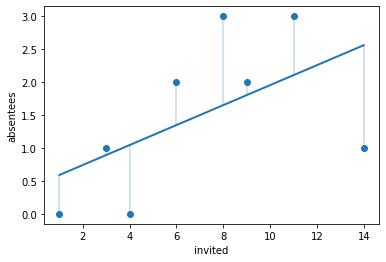

In [29]:
# Your code here.

# create linear regression model
lr2 = LinearRegression()

# run the model and identify the beta coefficients for the formula Y = beta_0 +  beta_1 * X
lr2.fit(
    X = df_party.invited.to_frame(),
    y = df_party.absentees
)

beta_2_1 = lr2.coef_[0]
beta_2_0 = lr2.intercept_

# add prediction to DF
y_hat2 = beta_2_0 + beta_2_1 * df_party.invited

# plot the scatter
plt.scatter(df_party.invited, df_party.absentees)
plt.plot(df_party.invited, y_hat2, lw=2)
plt.vlines(df_party.invited, y_hat2, df_party.absentees, lw=0.4)
plt.xlabel('invited')
plt.ylabel('absentees')
plt.show()

In [30]:
# calculate R^2

lr2.score(df_party.invited.to_frame(), df_party.absentees)

0.3030303030303031

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [31]:
# Your response here.

# results from the regression
df_party["model_1_absent"] = round(y_hat2, 2)
df_party

,invited,attendees,absentees,model_1_absent
0,1,1,0,0.59
1,3,2,1,0.89
2,4,4,0,1.05
3,6,4,2,1.35
4,8,5,3,1.65
5,9,7,2,1.80
6,11,8,3,2.11
7,14,13,1,2.56


From the scatterplot and the $R^2$ we can see that there is some relationship between number of invited guests and number of abstent guests, but the relationship is quite weak

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

The points that fit the least are when 4 guests are invited and when 14 guests are invited.

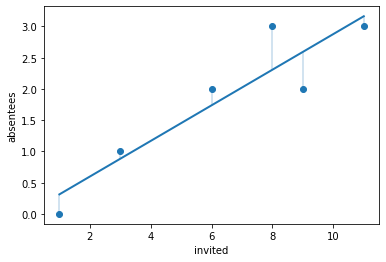

In [32]:
# Your response here.

# remove the first line
df_party2 = df_party.drop([df_party.index[2], df_party.index[7]])

# create linear regression model
lr3 = LinearRegression()

# run the model and identify the beta coefficients for the formula Y = beta_0 +  beta_1 * X
lr3.fit(
    X = df_party2.invited.to_frame(),
    y = df_party2.absentees
)

beta_3_1 = lr3.coef_[0]
beta_3_0 = lr3.intercept_

# add prediction to DF
y_hat3 = beta_3_0 + beta_3_1 * df_party2.invited

# plot the scatter
plt.scatter(df_party2.invited, df_party2.absentees)
plt.plot(df_party2.invited, y_hat3, lw=2)
plt.vlines(df_party2.invited, y_hat3, df_party2.absentees, lw=0.4)
plt.xlabel('invited')
plt.ylabel('absentees')
plt.show()

In [33]:
lr3.score(df_party2.invited.to_frame(), df_party2.absentees)

0.8481878276726693

In [34]:
# results from the regression

df_party2["model_2_absent"] = round(y_hat3, 2)
df_party2

,invited,attendees,absentees,model_1_absent,model_2_absent
0,1,1,0,0.59,0.31
1,3,2,1,0.89,0.88
3,6,4,2,1.35,1.74
4,8,5,3,1.65,2.31
5,9,7,2,1.80,2.59
6,11,8,3,2.11,3.16


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

After we droped two results that seemed not to fit with out hypothesis, then it was easier to find a line of best fit. This means that it was easier to predict the number of absent guests after the two 'outliers' were dropped. This can be seen in the scatter, where the vertical lines between the dots and the regression were shorter in the second case, and in $R^2$, that was significantly higher (0.85 vs 0.30) in the second case 